<a href="https://colab.research.google.com/github/andreamurari/percolation_project/blob/main/percolation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.cluster import DBSCAN

#FUNZIONI

In [2]:
#FUNZIONE CHE GENERA COORDINATE

def generate_poisson_coordinates(T, k):
  # Step 1: Generate N from Poisson distribution
  N = np.random.poisson(k * T**2)
  # Step 2: Check if N is zero and handle termination
  if N == 0:
    return []
  # Step 3: Generate random numbers and scale to coordinates
  else:
    coordinates_x = []
    coordinates_y = []
    for _ in range(N):
      U = np.random.random()
      V = np.random.random()
      coordinates_x.append(U * T)
      coordinates_y.append(V * T)
  print (f"N = {N} \nCoordinates X = {coordinates_x} \nCoordinates Y = {coordinates_y}")
  return coordinates_x, coordinates_y

In [3]:
#FUNZIONE CHE CREA CLUSTER
def clusterizza_e_rimuovi_duplicati(coordinates_x, coordinates_y, eps=1.0, min_samples=2):
  """
  Clusters points based on their distance using DBSCAN and removes duplicate clusters.

  Args:
    coordinates_x: List of x-coordinates.
    coordinates_y: List of y-coordinates.
    eps (float, optional): The maximum distance between two points to be considered neighbors. Defaults to 1.0.
    min_samples (int, optional): The minimum number of samples (including a point itself) to form a dense region. Defaults to 2.

  Returns:
    A list of unique clusters, where each cluster is a list of point indices.
  """

  # Combine x and y coordinates into a single NumPy array
  coordinates = np.array(list(zip(coordinates_x, coordinates_y)))

  # Create a DBSCAN instance with specified parameters
  db = DBSCAN(eps=eps, min_samples=min_samples)

  # Fit the model to the data points
  db.fit(coordinates)

  # Extract cluster labels for each point
  cluster_labels = db.labels_

  # Create a dictionary to store clusters efficiently (avoid duplicates)
  clusters = {}
  for i, label in enumerate(cluster_labels):
    # Skip noise points (labeled -1)
    if label == -1:
      continue
    # Add points to their cluster (dictionary key) using sets to remove duplicates within a cluster
    clusters.setdefault(label, set()).add(i)

  unique_clusters = list(clusters.values())
  return unique_clusters

In [4]:
#FUNZIONE PER SIZE DEL CLUSTER PIU GRANDE
def largest_cluster_size (clusters):
  max_cluster_size = 0
  for cluster in clusters:
    if len(cluster) > max_cluster_size:
      max_cluster_size = len(cluster)
  return max_cluster_size

In [5]:
#FUNZIONE CHE RESTITUISCE IL NUMERO DI CLUSTERS
def number_of_clusters(clusters):
  return len(clusters)

#SVOLGIMENTO

In [6]:
T = 5
l = 1

In [7]:
coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)

N = 15 
Coordinates X = [1.8060704671259065, 0.6510462199507056, 3.7576680409783942, 4.512827755331187, 2.1432729733268845, 0.7550005853491115, 4.784937513608937, 3.7910352183230605, 3.850399734947355, 3.9138970890733784, 2.399936166366348, 0.9186029039143745, 4.301658905401246, 2.4467908239971075, 2.7434090035050267] 
Coordinates Y = [0.8429372203927671, 2.0934434034726666, 4.241925774686612, 3.5391431565274276, 2.2327074865159577, 4.368333301513857, 1.5161600916930373, 4.914800669921026, 4.289523720814015, 2.0189484122831898, 1.8037291039599896, 0.7914841488328084, 3.976912845708221, 4.5592497565664205, 3.406109729613585]


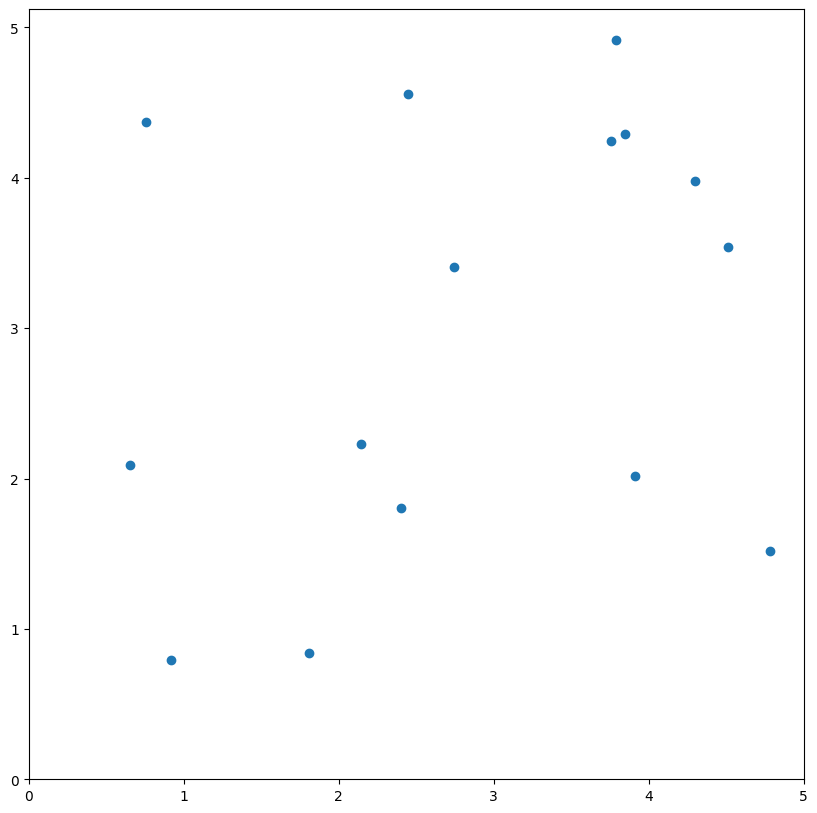

In [8]:
plt.figure(figsize = (10, 10))
plt.scatter (coordinates_x, coordinates_y)
plt.xticks(range(0, T + 1, 1))
plt.yticks(range(0, T + 1, 1))
plt.show()

In [9]:
clusters = clusterizza_e_rimuovi_duplicati(coordinates_x, coordinates_y)
print(clusters)

[{0, 11}, {2, 3, 7, 8, 12}, {10, 4}]


In [10]:
largest_cluster_size(clusters)

5